https://learn.microsoft.com/en-us/azure/open-datasets/dataset-microsoft-news?tabs=azureml-opendatasets

In [1]:
import os
import tempfile
import shutil
import urllib
import zipfile
import pandas as pd

# Temporary folder for data we need during execution of this notebook (we'll clean up
# at the end, we promise)
temp_dir = os.path.join(tempfile.gettempdir(), 'mind')
os.makedirs(temp_dir, exist_ok=True)

# The dataset is split into training and validation set, each with a large and small version.
# The format of the four files are the same.
# For demonstration purpose, we will use small version validation set only.
base_url = 'https://mind201910small.blob.core.windows.net/release'
training_small_url = f'{base_url}/MINDsmall_train.zip'
validation_small_url = f'{base_url}/MINDsmall_dev.zip'
# training_large_url = f'{base_url}/MINDlarge_train.zip'
# validation_large_url = f'{base_url}/MINDlarge_dev.zip'

In [2]:
def download_url(url,
                 destination_filename=None,
                 progress_updater=None,
                 force_download=False,
                 verbose=True):
    """
    Download a URL to a temporary file
    """
    if not verbose:
        progress_updater = None
    # This is not intended to guarantee uniqueness, we just know it happens to guarantee
    # uniqueness for this application.
    if destination_filename is None:
        url_as_filename = url.replace('://', '_').replace('/', '_')
        destination_filename = \
            os.path.join(temp_dir,url_as_filename)
    if (not force_download) and (os.path.isfile(destination_filename)):
        if verbose:
            print('Bypassing download of already-downloaded file {}'.format(
                os.path.basename(url)))
        return destination_filename
    if verbose:
        print('Downloading file {} to {}'.format(os.path.basename(url),
                                                 destination_filename),
              end='')
    urllib.request.urlretrieve(url, destination_filename, progress_updater)
    assert (os.path.isfile(destination_filename))
    nBytes = os.path.getsize(destination_filename)
    if verbose:
        print('...done, {} bytes.'.format(nBytes))
    return destination_filename

In [18]:
os.getcwd()

'/Users/mayanksingh/VSCodeProjects/metrics-customerN'

In [19]:
# For demonstration purpose, we will use small version training set only.
zip_path = download_url(training_small_url, verbose=True)
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(os.getcwd())

os.listdir(os.getcwd())

['behaviors.tsv',
 'reclist',
 'news.tsv',
 'MIND_etl.ipynb',
 'README.md',
 'tutorial1_exploring.ipynb',
 '.venv',
 'entity_embedding.vec',
 'evalRS-KDD-2023',
 '.git',
 'relation_embedding.vec',
 '.conda']

In [20]:
# The behaviors.tsv file contains the impression logs and users' news click histories. 
# It has 5 columns divided by the tab symbol:
# - Impression ID. The ID of an impression.
# - User ID. The anonymous ID of a user.
# - Time. The impression time with format "MM/DD/YYYY HH:MM:SS AM/PM".
# - History. The news click history (ID list of clicked news) of this user before this impression.
# - Impressions. List of news displayed in this impression and user's click behaviors on them (1 for click and 0 for non-click).
cur_dir = os.getcwd()
behaviors_path = os.path.join(cur_dir, 'behaviors.tsv')
behaviors_df = pd.read_table(
                        behaviors_path,
                        header=None,
                        names=['impression_id', 'user_id', 'time', 'history', 'impressions'])

In [21]:
behaviors_df.head()

,impression_id,user_id,time,history,impressions
0,1,U13740,11/11/2019 9:05:58 AM,N55189 N42782 N34694 N45794 N18445 N63302 N104...,N55689-1 N35729-0
1,2,U91836,11/12/2019 6:11:30 PM,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N20678-0 N39317-0 N58114-0 N20495-0 N42977-0 N...
2,3,U73700,11/14/2019 7:01:48 AM,N10732 N25792 N7563 N21087 N41087 N5445 N60384...,N50014-0 N23877-0 N35389-0 N49712-0 N16844-0 N...
3,4,U34670,11/11/2019 5:28:05 AM,N45729 N2203 N871 N53880 N41375 N43142 N33013 ...,N35729-0 N33632-0 N49685-1 N27581-0
4,5,U8125,11/12/2019 4:11:21 PM,N10078 N56514 N14904 N33740,N39985-0 N36050-0 N16096-0 N8400-1 N22407-0 N6...


In [23]:
behaviors_df.shape

(156965, 5)

In [25]:
behaviors_df.loc[behaviors_df['user_id'] == 'U91836']

,impression_id,user_id,time,history,impressions
1,2,U91836,11/12/2019 6:11:30 PM,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N20678-0 N39317-0 N58114-0 N20495-0 N42977-0 N...
6672,6673,U91836,11/9/2019 6:21:10 PM,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N26721-0 N6658-0 N23548-0 N13423-0 N18870-0 N3...
10937,10938,U91836,11/10/2019 5:37:46 PM,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N40110-0 N41224-0 N55489-0 N23085-0 N28820-1 N...
20675,20676,U91836,11/9/2019 5:28:51 AM,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N46057-0 N29017-0 N7128-0 N18378-0 N27845-0 N5...
45064,45065,U91836,11/13/2019 8:06:29 PM,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N14029-1 N4404-0 N51048-0 N49712-0 N36261-0 N3...
57350,57351,U91836,11/11/2019 4:50:30 PM,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N46029-0 N46526-0 N54489-1 N8191-0 N53585-0 N2...
66721,66722,U91836,11/12/2019 3:21:36 PM,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N39317-0 N40380-0 N261-0 N20678-0 N40839-0 N49...
77119,77120,U91836,11/12/2019 7:21:20 PM,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N14592-0 N39317-0 N20915-0 N62386-0 N19423-0 N...
84986,84987,U91836,11/12/2019 5:20:00 PM,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N33885-1 N20495-0
97244,97245,U91836,11/10/2019 5:43:35 AM,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N61022-0 N9473-0 N12589-0 N54595-0 N42346-0 N4...


In [26]:
#Look at count of impressions per user id
behaviors_df['impression_count'] = behaviors_df['impressions'].apply(lambda x: len(x.split(' ')))

In [27]:
behaviors_df.loc[behaviors_df['user_id'] == 'U91836']

,impression_id,user_id,time,history,impressions,impression_count
1,2,U91836,11/12/2019 6:11:30 PM,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N20678-0 N39317-0 N58114-0 N20495-0 N42977-0 N...,11
6672,6673,U91836,11/9/2019 6:21:10 PM,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N26721-0 N6658-0 N23548-0 N13423-0 N18870-0 N3...,21
10937,10938,U91836,11/10/2019 5:37:46 PM,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N40110-0 N41224-0 N55489-0 N23085-0 N28820-1 N...,22
20675,20676,U91836,11/9/2019 5:28:51 AM,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N46057-0 N29017-0 N7128-0 N18378-0 N27845-0 N5...,40
45064,45065,U91836,11/13/2019 8:06:29 PM,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N14029-1 N4404-0 N51048-0 N49712-0 N36261-0 N3...,11
57350,57351,U91836,11/11/2019 4:50:30 PM,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N46029-0 N46526-0 N54489-1 N8191-0 N53585-0 N2...,7
66721,66722,U91836,11/12/2019 3:21:36 PM,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N39317-0 N40380-0 N261-0 N20678-0 N40839-0 N49...,18
77119,77120,U91836,11/12/2019 7:21:20 PM,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N14592-0 N39317-0 N20915-0 N62386-0 N19423-0 N...,27
84986,84987,U91836,11/12/2019 5:20:00 PM,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N33885-1 N20495-0,2
97244,97245,U91836,11/10/2019 5:43:35 AM,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N61022-0 N9473-0 N12589-0 N54595-0 N42346-0 N4...,14


In [28]:
median_impr_user = behaviors_df.groupby('user_id')['impression_count'].median().reset_index()

<Axes: >

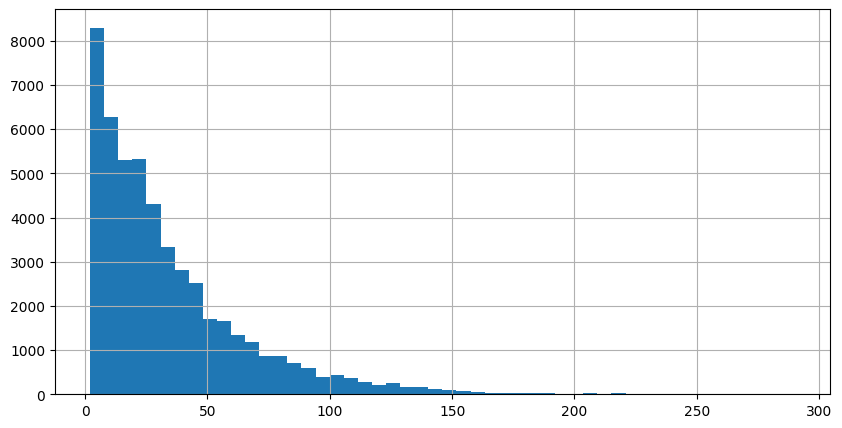

In [34]:
# plot histogram users by impressions
median_impr_user['impression_count'].hist(bins=50, figsize=(10,5))

In [31]:
median_impr_user.head()

,user_id,impression_count
0,U100,105.0
1,U1000,57.0
2,U10001,42.0
3,U10003,53.0
4,U10008,72.0


plot standard deviation within median bucket and compare with Grubhub data

In [5]:
# The news.tsv file contains the detailed information of news articles involved in the behaviors.tsv file.
# It has 7 columns, which are divided by the tab symbol:
# - News ID
# - Category
# - Subcategory
# - Title
# - Abstract
# - URL
# - Title Entities (entities contained in the title of this news)
# - Abstract Entities (entities contained in the abstract of this news)
news_path = os.path.join(temp_dir, 'news.tsv')
pd.read_table(news_path,
              header=None,
              names=[
                  'id', 'category', 'subcategory', 'title', 'abstract', 'url',
                  'title_entities', 'abstract_entities'
              ])

,id,category,subcategory,title,abstract,url,title_entities,abstract_entities
0,N55528,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...",https://assets.msn.com/labs/mind/AAGH0ET.html,"[{""Label"": ""Prince Philip, Duke of Edinburgh"",...",[]
1,N18955,health,medical,Dispose of unwanted prescription drugs during ...,NaN,https://assets.msn.com/labs/mind/AAISxPN.html,"[{""Label"": ""Drug Enforcement Administration"", ...",[]
2,N61837,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,https://assets.msn.com/labs/mind/AAJgNsz.html,[],"[{""Label"": ""Ukraine"", ""Type"": ""G"", ""WikidataId..."
3,N53526,health,voices,I Was An NBA Wife. Here's How It Affected My M...,"I felt like I was a fraud, and being an NBA wi...",https://assets.msn.com/labs/mind/AACk2N6.html,[],"[{""Label"": ""National Basketball Association"", ..."
4,N38324,health,medical,"How to Get Rid of Skin Tags, According to a De...","They seem harmless, but there's a very good re...",https://assets.msn.com/labs/mind/AAAKEkt.html,"[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI...","[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI..."
...,...,...,...,...,...,...,...,...
42411,N63550,lifestyle,lifestyleroyals,Why Kate & Meghan Were on Different Balconies ...,There's no scandal here. It's all about the or...,https://assets.msn.com/labs/mind/BBWyynu.html,"[{""Label"": ""Meghan, Duchess of Sussex"", ""Type""...",[]
42412,N30345,entertainment,entertainment-celebrity,See the stars at the 2019 Baby2Baby gala,Stars like Chrissy Teigen and Kate Hudson supp...,https://assets.msn.com/labs/mind/BBWyz7N.html,[],"[{""Label"": ""Kate Hudson"", ""Type"": ""P"", ""Wikida..."
42413,N30135,news,newsgoodnews,Tennessee judge holds lawyer's baby as he swea...,Tennessee Court of Appeals Judge Richard Dinki...,https://assets.msn.com/labs/mind/BBWyzI8.html,"[{""Label"": ""Tennessee"", ""Type"": ""G"", ""Wikidata...","[{""Label"": ""Tennessee Court of Appeals"", ""Type..."
42414,N44276,autos,autossports,Best Sports Car Deals for October,NaN,https://assets.msn.com/labs/mind/BBy5rVe.html,"[{""Label"": ""Peugeot RCZ"", ""Type"": ""V"", ""Wikida...",[]


In [6]:
# The entity_embedding.vec file contains the 100-dimensional embeddings
# of the entities learned from the subgraph by TransE method.
# The first column is the ID of entity, and the other columns are the embedding vector values.
entity_embedding_path = os.path.join(temp_dir, 'entity_embedding.vec')
entity_embedding = pd.read_table(entity_embedding_path, header=None)
entity_embedding['vector'] = entity_embedding.iloc[:, 1:101].values.tolist()
entity_embedding = entity_embedding[[0,
                                     'vector']].rename(columns={0: "entity"})
entity_embedding

,entity,vector
0,Q34433,"[0.017808, -0.073256, 0.102521, -0.059926, -0...."
1,Q41,"[-0.063388, -0.181451, 0.057501, -0.091254, -0..."
2,Q56037,"[0.02155, -0.044888, -0.027872, -0.128843, 0.0..."
3,Q1860,"[0.060958, 0.069934, 0.015832, 0.079471, -0.02..."
4,Q39631,"[-0.093106, -0.052002, 0.020556, -0.020801, 0...."
...,...,...
22888,Q278846,"[0.042413, 0.021957, 0.072414, -0.068437, 0.02..."
22889,Q54621949,"[-0.018299, -0.048378, -0.021645, -0.079743, 0..."
22890,Q42225228,"[-0.051346, -0.028947, -0.07587, 0.017512, -0...."
22891,Q54862508,"[-0.052323, -0.078029, -0.060925, -0.052536, 0..."


In [7]:
# The relation_embedding.vec file contains the 100-dimensional embeddings
# of the relations learned from the subgraph by TransE method.
# The first column is the ID of relation, and the other columns are the embedding vector values.
relation_embedding_path = os.path.join(temp_dir, 'relation_embedding.vec')
relation_embedding = pd.read_table(relation_embedding_path, header=None)
relation_embedding['vector'] = relation_embedding.iloc[:,
                                                       1:101].values.tolist()
relation_embedding = relation_embedding[[0, 'vector'
                                         ]].rename(columns={0: "relation"})
relation_embedding

,relation,vector
0,P31,"[-0.073467, -0.132227, 0.034173, -0.032769, 0...."
1,P21,"[-0.078436, 0.108589, -0.049429, -0.131355, 0...."
2,P106,"[-0.052137, 0.052444, -0.019886, -0.152309, 0...."
3,P735,"[-0.051398, 0.056219, 0.068029, -0.137717, -0...."
4,P108,"[0.091231, 0.022526, 0.059349, -0.141853, 0.03..."
...,...,...
1086,P1897,"[-0.019021, 0.001183, -0.009602, -0.040833, -0..."
1087,P3776,"[-0.018365, 0.028526, -0.025934, 0.032296, -0...."
1088,P1194,"[-0.026819, 0.003231, -0.011298, -0.015206, 0...."
1089,P2502,"[0.003554, -0.041121, -0.010559, -0.037862, -0..."
